In [12]:
import pandas as pd
prices = pd.read_csv("data/sample_prices.csv")
returns = prices.pct_change()
returns = returns.dropna() #Drop the NaN becuase of the lack of pct return for first day
returns

,BLUE,ORANGE
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249
10,0.006151,-0.168261


In [13]:
# The risk i.e. volatility, can be found by calculating the standard deviation
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [18]:
deviations = returns - returns.mean()
squared_deviations = deviations ** 2

variance = squared_deviations.mean() #Population variance, need to calculate the sample variance
variance

BLUE      0.000527
ORANGE    0.005808
dtype: float64

In [16]:
# We could find the volatility by taking the variance ** 0.5
# Importing the numpy library will be useful for subsequent calculations though
import numpy as np
volatility = np.sqrt(variance)
volatility

BLUE      0.022957
ORANGE    0.076212
dtype: float64

In [19]:
num_observations = returns.shape[0] # shape = [12, 2]
variance = squared_deviations.sum()/(num_observations - 1) # for the sample variance we do n-1
variance

BLUE      0.000575
ORANGE    0.006336
dtype: float64

In [20]:
volatility = np.sqrt(variance)
volatility

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [23]:
# or
volatility = returns.std()
volatility

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [24]:
annualised_volatility = volatility * np.sqrt(12)
annualised_volatility

BLUE      0.083060
ORANGE    0.275747
dtype: float64

## Using real data
Data set covering July 1926 - November 2018
Portoflios are broken up as groupings of companies by market cap

In [25]:
returns = pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv", 
                     header = 0,
                     index_col = 0,
                     parse_dates = True,
                     na_values=-99.99)

In [26]:
returns.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [28]:
# Only intersted in the low and high 10
columns = ['Lo 10', 'Hi 10']
returns = returns[columns]
returns.head()

,Lo 10,Hi 10
192607,-1.45,3.29
192608,5.12,3.70
192609,0.93,0.67
192610,-4.84,-2.43
192611,-0.78,2.70


In [29]:
# The numbers are given as a percentage, we want to represent them as a factor of 1
returns = returns/100
returns.head()

,Lo 10,Hi 10
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


In [31]:
# Lo 10 and Hi 10 represent small and large caps so we'll rename them
returns.columns = ['Small Cap', 'Large Cap']
returns.head()

,Small Cap,Large Cap
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


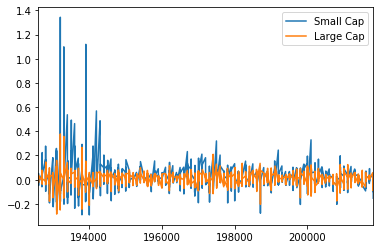

In [32]:
returns.plot.line()

In [33]:
# From the plot it is clear that small caps are more volatile
annualised_volatility = returns.std() * np.sqrt(12)
annualised_volatility

Small Cap    0.368193
Large Cap    0.186716
dtype: float64

# Annualised returns

In [38]:
AT_return = (returns + 1).prod() - 1
AT_return

Small Cap    1.659582e+06
Large Cap    3.674948e+03
dtype: float64

In [39]:
# Compounding is mad, lets find the return per month
num_months = returns.shape[0]
monthly_return = (returns + 1).prod()**(1/num_months) - 1
monthly_return

Small Cap    0.012986
Large Cap    0.007423
dtype: float64

In [40]:
annualised_volatility

Small Cap    0.368193
Large Cap    0.186716
dtype: float64

In [41]:
annualised_return = (monthly_return + 1) ** 12 - 1
annualised_return

Small Cap    0.167463
Large Cap    0.092810
dtype: float64

In [42]:
# Or, calculating the annual return in a one liner
annualised_return = (returns + 1).prod() ** (12/num_months) - 1
annualised_return

Small Cap    0.167463
Large Cap    0.092810
dtype: float64

In [43]:
# The risk return ratio
annualised_return/annualised_volatility

Small Cap    0.454825
Large Cap    0.497063
dtype: float64

# Sharpe ratio

In [45]:
risk_free_rate = 0.03 #or 0.008 in Germany in 2020
excess_returns = annualised_return - risk_free_rate
sharpe_ratio = excess_returns/annualised_volatility
sharpe_ratio

Small Cap    0.373346
Large Cap    0.336392
dtype: float64